# 一次元データに対するBS法 図の描画など

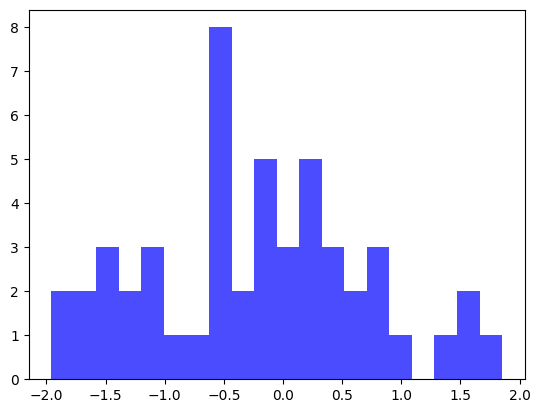

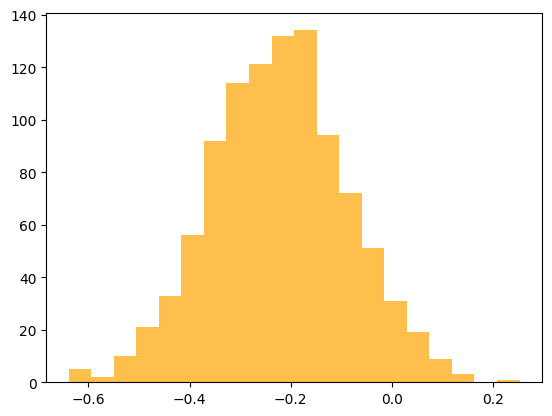

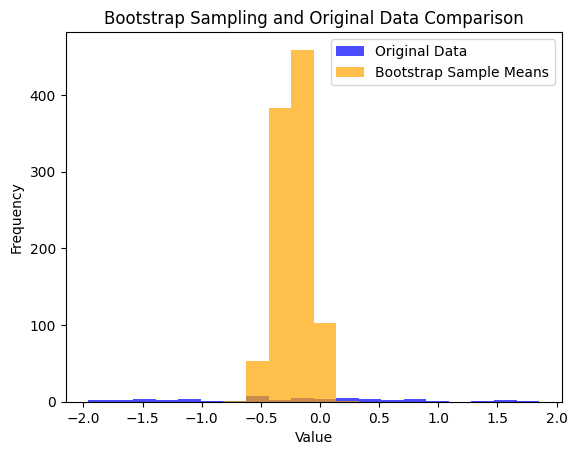

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 元データの作成
np.random.seed(42)
data = np.random.randn(50)

# ブートストラップサンプリング関数の定義
def bootstrap(data, n_samples):
    """
    :param data: 元データ(一次元配列)
    :param n_samples: サンプリング回数
    :return: ブートストラップされたサンプル群
    """
    n = len(data)
    bootstrap_samples = []
    for _ in range(n_samples):
        sample = np.random.choice(data, n, replace=True)
        bootstrap_samples.append(sample)
    return np.array(bootstrap_samples)
    
# ブートストラップサンプリングの実行
n_samples = 1000 # サンプリング回数
bootstrap_samples = bootstrap(data, n_samples)
# print(bootstrap_samples) # [[サンプル1, サンプル2, ...], ...]
# print('len(data):', len(data)) # 50

# ブートストラップサンプルの平均を計算
bootstrap_means = np.mean(bootstrap_samples, axis=1)
# print(bootstrap_means) # [ブートストラップサンプル1の平均, ブートストラップサンプル2の平均, ...]
# print('len(bootstrap_means):', len(bootstrap_means)) # 1000

# 共通のビン境界を定義
min_value = min(data.min(), bootstrap_means.min())  # 最小値
max_value = max(data.max(), bootstrap_means.max())  # 最大値
bins = np.linspace(min_value, max_value, 21)  # 20個の区間に分ける（ビン境界を21個）

# 元データのヒストグラム
plt.hist(data, bins=20, alpha=0.7, color='blue', label='Original Data')
# 表示
plt.show()

# ブートストラップサンプル平均のヒストグラム
plt.hist(bootstrap_means, bins=20, alpha=0.7, color='orange', label='Bootstrap Sample Means')
# 表示
plt.show()


# 元データのヒストグラム
plt.hist(data, bins=bins, alpha=0.7, color='blue', label='Original Data')
# ブートストラップサンプル平均のヒストグラム
plt.hist(bootstrap_means, bins=bins, alpha=0.7, color='orange', label='Bootstrap Sample Means')

# グラフの装飾
plt.title("Bootstrap Sampling and Original Data Comparison")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# 表示
plt.show()

In [3]:
import statistics
# もとデータの平均
print("Original Data", statistics.mean(data))
# もとデータの分散
print("Original Data", statistics.pvariance(data))
# 標本平均
print("sampled_data", statistics.mean(bootstrap_means))
# 標本分散  
print("sampled_data", statistics.pvariance(bootstrap_means))

Original Data -0.22547390525614008
Original Data 0.8543026463778314
sampled_data -0.2229596939464594
sampled_data 0.01777243819141643


In [4]:
print('data',data)
# もとデータの平均
print("Original Data", statistics.mean(data))
# もとデータの分散
print("Original Data", statistics.pvariance(data))

data [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016]
Original Data -0.22547390525614008
Original Data 0.8543026463778314
